In [13]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
print(tf.config.list_physical_devices())
import matplotlib.pyplot as plt
import pandas as pd

2.9.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

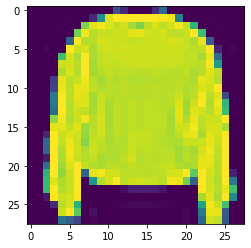

In [15]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [4]:
train_labels[7]

2

In [55]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names), class_names[train_labels[7]]

(10, 'Pullover')

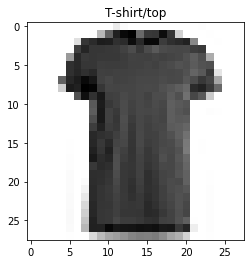

In [6]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

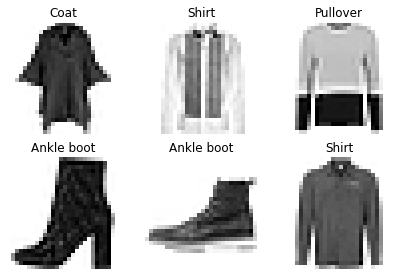

In [7]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
x = 5
if x%2 ==1:
    x = x+1
for i in range(x):
    ax = plt.subplot(x/2, x/2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [17]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Neural networks prefer data to be scaled (normalization or scaling)

In [18]:
train_data_norm = train_data/255
test_data_norm = test_data/255

In [24]:

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_2.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1766 - accuracy: 0.5501 - val_loss: 0.8390 - val_accuracy: 0.6967
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7418 - accuracy: 0.7356 - val_loss: 0.7360 - val_accuracy: 0.7377
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6635 - accuracy: 0.7674 - val_loss: 0.6743 - val_accuracy: 0.7612
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6280 - accuracy: 0.7834 - val_loss: 0.6537 - val_accuracy: 0.7779
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6068 - accuracy: 0.7909 - val_loss: 0.6494 - val_accuracy: 0.7734
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5960 - accuracy: 0.7951 - val_loss: 0.6414 - val_accuracy: 0.7810
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5879 - accuracy: 0.7973 - val_loss: 0.6110 - val_accuracy:

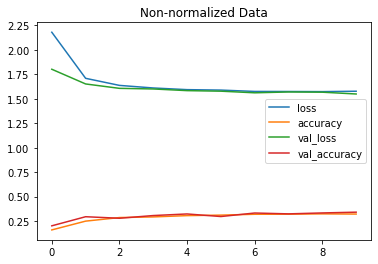

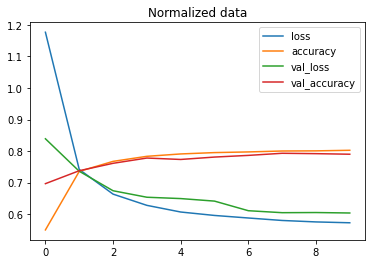

In [26]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [25]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_3.fit(train_data_norm,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1215 - accuracy: 0.5834 - val_loss: 0.7733 - val_accuracy: 0.7117 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6988 - accuracy: 0.7305 - val_loss: 0.6881 - val_accuracy: 0.7391 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6492 - accuracy: 0.7520 - val_loss: 0.6611 - val_accuracy: 0.7528 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6257 - accuracy: 0.7660 - val_loss: 0.6474 - val_accuracy: 0.7671 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6061 - accuracy: 0.7784 - val_loss: 0.6270 - val_accuracy: 0.7866 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5819 - accuracy: 0.7940 - val_loss: 0.6345 - val_accuracy: 0.7749 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

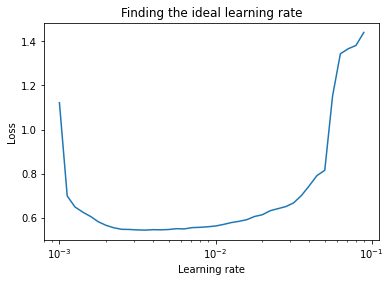

In [27]:
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

10**-3 is the best learning rate

In [46]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
find_lr_history = model_4.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels))

C:\Users\gonz3\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2861 - accuracy: 0.5378 - val_loss: 0.7833 - val_accuracy: 0.7302
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7005 - accuracy: 0.7592 - val_loss: 0.6901 - val_accuracy: 0.7664
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6352 - accuracy: 0.7735 - val_loss: 0.6664 - val_accuracy: 0.7559
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6071 - accuracy: 0.7803 - val_loss: 0.6261 - val_accuracy: 0.7737
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5915 - accuracy: 0.7833 - val_loss: 0.6188 - val_accuracy: 0.7796
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5781 - accuracy: 0.7883 - val_loss: 0.6344 - val_accuracy: 0.7681
Epoch 7/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5651 - accuracy: 0.7937 - val_loss: 0.6133 - val_accuracy:

In [43]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [51]:
# Make predictions with the most recent model
y_probs = model_4.predict(test_data_norm  ) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.4909259e-10, 1.4319348e-11, 1.4214004e-12, 1.5335955e-07,
        1.2814030e-08, 4.0647817e-01, 3.5224099e-09, 8.6510681e-02,
        3.3812250e-06, 5.0700760e-01],
       [6.7318411e-04, 1.6164877e-06, 8.4328812e-01, 5.0220772e-04,
        5.1119845e-02, 1.9977853e-34, 1.0441487e-01, 0.0000000e+00,
        7.4646401e-08, 1.7183700e-37],
       [1.5090696e-04, 9.9611098e-01, 3.4296662e-03, 2.0293934e-04,
        9.6884323e-05, 4.3794056e-20, 8.6275741e-06, 7.6080072e-27,
        1.9437893e-10, 4.2599150e-19],
       [6.8446579e-06, 9.9888009e-01, 2.2655922e-05, 1.0209653e-03,
        6.9018322e-05, 3.6326593e-20, 5.1197839e-07, 1.5932647e-26,
        4.9159175e-12, 7.1031200e-15],
       [2.3632401e-01, 4.6871242e-05, 2.2547425e-01, 1.0122842e-02,
        9.1694258e-03, 5.8823560e-17, 5.1773006e-01, 2.1722622e-38,
        1.1325354e-03, 1.4599909e-23]], dtype=float32)

In [52]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [53]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[846,   9,  17,  55,   0,   2,  51,   0,  20,   0],
       [  0, 958,   9,  28,   3,   0,   0,   0,   2,   0],
       [ 34,   2, 748,  11, 103,   0,  98,   0,   4,   0],
       [ 54,  24,  15, 834,  20,   2,  40,   1,   9,   1],
       [  3,   6, 158,  42, 699,   0,  83,   0,   9,   0],
       [  0,   0,   0,   1,   0, 912,   0,  43,  12,  32],
       [204,   6, 120,  46,  92,   1, 495,   0,  36,   0],
       [  0,   0,   0,   0,   0,  44,   0, 925,   0,  31],
       [  6,   1,   2,  11,   7,  14,  29,   4, 926,   0],
       [  0,   0,   0,   1,   0,  31,   0,  55,   1, 912]], dtype=int64)

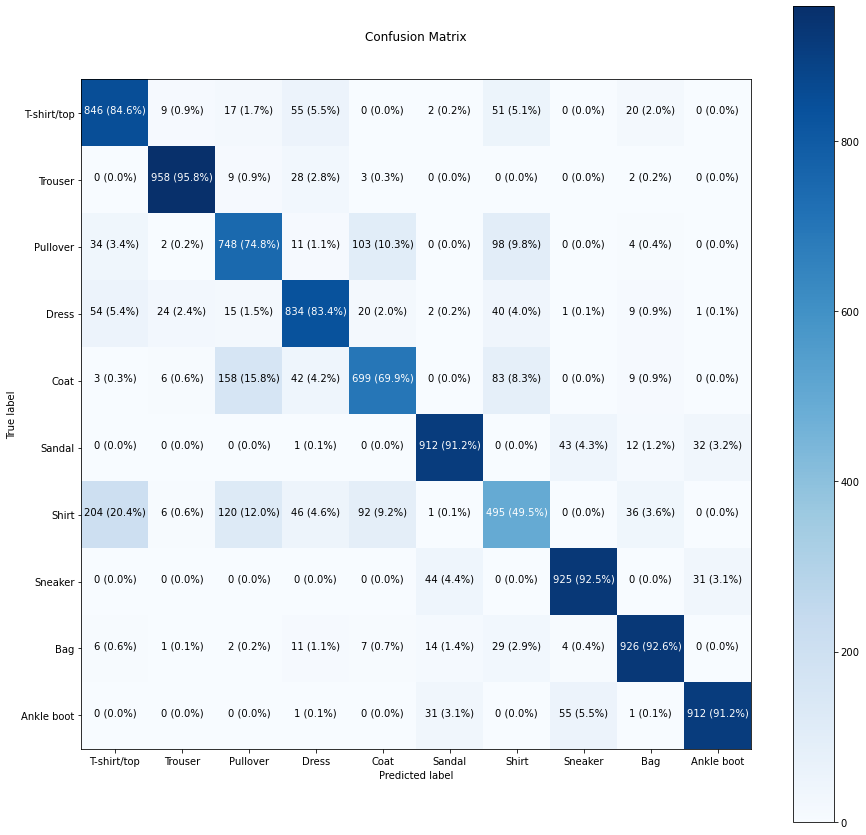

In [56]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [60]:
import random

In [61]:
def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it and labels it with a predicted and truth label.

    Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

    Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
    """ 
    # Setup random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 15ms/step


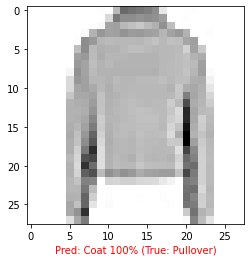

In [79]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [82]:
#look at model layers
model_4.layers

In [84]:
model_4.layers[1]

In [86]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.8939818 ,  1.2521715 ,  0.69522136, -0.6226375 ],
        [-2.2167258 ,  0.8504381 ,  1.927498  ,  1.1069334 ],
        [-1.0399678 ,  1.1785507 ,  0.873123  ,  0.489207  ],
        ...,
        [ 0.50573814,  0.7005213 ,  0.09365786,  0.23881604],
        [-0.04391723, -0.52791137,  0.8513809 ,  1.2194266 ],
        [ 0.6222877 ,  1.3399727 , -0.0566261 ,  0.29177257]],
       dtype=float32),
 (784, 4))

In [87]:
biases, biases.shape

(array([ 1.4608605 ,  2.6671133 ,  2.239459  , -0.00399626], dtype=float32),
 (4,))

In [96]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 4)                 3140      
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [97]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [94]:
!pip install pydot==1.2.3

  Created wheel for pydot: filename=pydot-1.2.3-py3-none-any.whl size=18931 sha256=9f16a13b449e72ed9ce4b86d40744ea679b4344e5184a29a9a8b22474fd9e842
  Stored in directory: c:\users\gonz3\appdata\local\pip\cache\wheels\97\f3\4f\2614983209399831c4b278ae354b87b35cdc070703c5c8611d
Successfully built pydot
  Attempting uninstall: pydot
    Found existing installation: pydot 1.4.2
    Uninstalling pydot-1.4.2:
      Successfully uninstalled pydot-1.4.2
